# Capstone Project

### This project is the final module in a 9-modules Training around Datascience from Coursera.

In [12]:
import pandas as pd
import numpy as np

In [13]:
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Introduction
### Starting with a Incident Report in Seattle, we would like to predict the Severity level of an accident. 
#### - Are there specific hot zones ?
#### - What are the features that increase the serverity level of an accident ? 
#### - Can we do anything (actionable feature) to lower future accident severity ?
### In a nutshell, how can a Data Science Analysis help Seattle to improve his citizenship' security on their way ?

# 1.Data Understanding

In [4]:
print ('First : download Collision dataset')
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.shape

First : download Collision dataset


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 38)

In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [7]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [9]:
! conda install -c conda-forge folium

Solving environment: done

# All requested packages already installed.



### 1.1 Work on Data types

In [10]:
# Data Type = DateTime
# Denormalize Date of Incident
df['INC_DD'] =  pd.to_datetime(df['INCDATE']).dt.dayofweek
df['INC_MM'] =  pd.to_datetime(df['INCDATE']).dt.month
df['INC_YY'] =  pd.to_datetime(df['INCDATE']).dt.year
df_period = df[['SEVERITYCODE','INCDATE','INC_DD','INC_MM','INC_YY']]
df_period.head()

,SEVERITYCODE,INCDATE,INC_DD,INC_MM,INC_YY
0,2,2013/03/27 00:00:00+00,2,3,2013
1,1,2006/12/20 00:00:00+00,2,12,2006
2,1,2004/11/18 00:00:00+00,3,11,2004
3,1,2013/03/29 00:00:00+00,4,3,2013
4,2,2004/01/28 00:00:00+00,2,1,2004


### 1.2 Work on missing Values

### 1.3 See impact of several feature on Severity Level

In [14]:
# some imports to set up plotting 
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns

##### 1.3.1 Has Date any impact ?

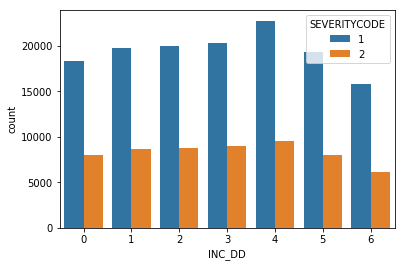

In [15]:
# See trend over Periods : by Day
sns.countplot(x='INC_DD', hue='SEVERITYCODE', data=df_period)

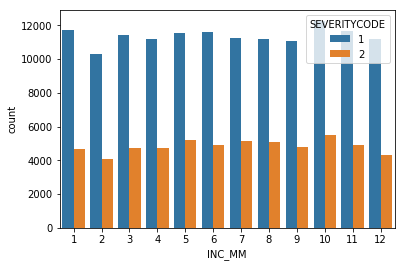

In [16]:
# See trend over Periods : by Month
sns.countplot(x='INC_MM', hue='SEVERITYCODE', data=df_period)

##### 1.3.2 Impact of any External Conditions ?

In [17]:
df['WEATHER'].value_counts()   

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [18]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [19]:
# Define VISIBILITY from WEATHER
# Pack : Other, Unknown as Others => 0 
# Visibility OK : Clear, Severe Crosswind => 1
# Visibility NOK : Blowing Sand/Dirt, Fog/Smog/Smoke, Partly Cloudy, Raining, Sleet/Hail/Freezing Rain, Snowing => 2

# Cross Analysis within VISIBILITY (WEATHER) vs LIGHTCOND


##### 1.3.3 Impact of any Internal Conditions ?

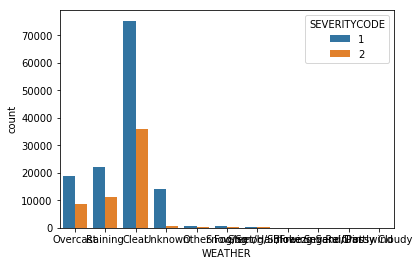

In [20]:
sns.countplot(x='WEATHER', hue='SEVERITYCODE', data=df)

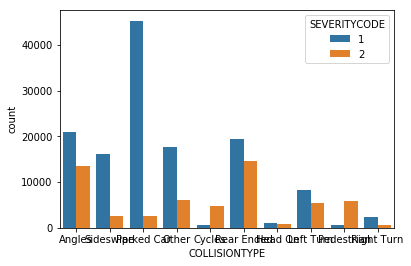

In [21]:
sns.countplot(x='COLLISIONTYPE',hue='SEVERITYCODE',data=df)

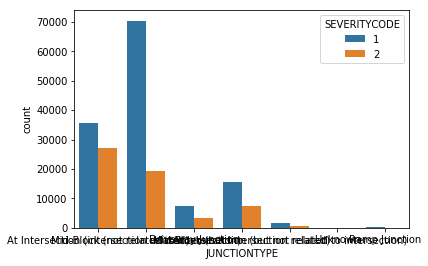

In [22]:
sns.countplot(x='JUNCTIONTYPE',hue='SEVERITYCODE',data=df)

In [23]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [24]:
df['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          85209
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    54299
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9928
NOT ENOUGH INFORMATION / NOT APPLICABLE                          9787
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8856
MOTOR VEHCILE STRUCK PEDESTRIAN                                  6518
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4741
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3104
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1604
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1440
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1312
MOTOR VEHICLE OVERTURNED IN ROAD                                  479
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       181
PEDALCYCLIST STRUCK 

In [25]:
df['ST_COLDESC'].value_counts()

One parked--one moving                                                                   44421
Entering at angle                                                                        34674
From same direction - both going straight - one stopped - rear-end                       25771
Fixed object                                                                             13554
From same direction - both going straight - both moving - sideswipe                      12777
From opposite direction - one left turn - one straight                                   10324
From same direction - both going straight - both moving - rear-end                        7629
Vehicle - Pedalcyclist                                                                    4701
From same direction - all others                                                          4537
From same direction - one left turn - one straight                                        3093
From same direction - one right turn - one straigh

In [26]:
df['PERSONCOUNT'].value_counts()

2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

In [27]:
df['PEDCOUNT'].value_counts()

0    187734
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

In [28]:
df['PEDCYLCOUNT'].value_counts()

0    189189
1      5441
2        43
Name: PEDCYLCOUNT, dtype: int64

In [29]:
df['VEHCOUNT'].value_counts()

2     147650
1      25748
3      13010
0       5085
4       2426
5        529
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

In [33]:
import folium
from folium import plugins
from folium import CircleMarker
seattle_map = folium.Map(location = [47.6062,-122.3321], tiles = 'OpenStreetMap', zoom_start = 11 )

In [34]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

In [41]:
# shrink dataset for plotting on Map
df_map = df[['X','Y','SEVERITYCODE']]
# drop rows with missing latitude/longitude values
df_map.dropna(inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
# loop through all the incidents and add each to the incidents feature group
for lat, lng, in zip(df_map.Y, df_map.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='yellow',
            fill=False,
            fill_color='yellow',
            fill_opacity=0.1
        )
    )

# add incidents to map
seattle_map.add_child(incidents)

# display map
seattle_map